In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Pandas

## Конфигурирование

In [89]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.float_format', '{:.2f}'.format)

In [90]:
#pd.describe_option()
pd.get_option('display.max_columns')

40

## Series

### Созданиe

In [91]:
cities = ['Moscow', 'Saint-Petersburg', 'Penza']
area = [123, 100, 15]
cities_area_series = pd.Series(data=area, index=cities, name='cities_area')
cities_area_series

Moscow              123
Saint-Petersburg    100
Penza                15
Name: cities_area, dtype: int64

In [92]:
cars_price = {'geely': 2_000_000, 'haval': 2.5*1E6}
pd.Series(cars_price, name='cars_price')

geely   2000000.00
haval   2500000.00
Name: cars_price, dtype: float64

### Получение данных

In [93]:
print(cities_area_series['Moscow'], cities_area_series.iloc[0])

123 123


In [94]:
cities_area_series[cities_area_series >= 100]

Moscow              123
Saint-Petersburg    100
Name: cities_area, dtype: int64

### Изменение данных

In [95]:
cities_area_series['Moscow'] = 250
print(cities_area_series['Moscow'])

250


In [96]:
cities_area_series.index=['London', 'Paris', 'Amsterdam']
cities_area_series

London       250
Paris        100
Amsterdam     15
Name: cities_area, dtype: int64

In [97]:
def increase_by_two(x):
    return x + 2

cities_area_series = cities_area_series.apply(increase_by_two)
cities_area_series

London       252
Paris        102
Amsterdam     17
Name: cities_area, dtype: int64

## DataFrame

In [223]:
stock_price = pd.read_csv("SPCE_stock.csv", parse_dates=['dt'], skiprows=0)
stock_price.head()

,dt,price,change,change_percent,volume
0,2023-01-03 16:00:00,3.49,0.00,0.00,7668027.00
1,2023-01-04 16:00:00,3.64,0.15,0.04,4858879.00
2,2023-01-05 16:00:00,3.66,0.17,0.05,5262860.00
3,2023-01-06 16:00:00,3.69,0.20,0.06,4090692.00
4,2023-01-09 16:00:00,3.91,0.42,0.12,10357731.00


### Создание новых столбцов

In [245]:
# добавление столбца с временем года на основании даты
def season(t_val):
    if t_val.month in (12,1,2):
        return 'winter'
    elif t_val.month in (3,4,5):
        return 'spring'
    elif t_val.month in (6,7,8):
        return "summer"
    else:
        return "autumn"
    

stock_price['season'] = stock_price['dt'].apply(season)
stock_price['season'].value_counts(normalize=True, dropna=False)

season
spring   0.28
summer   0.28
autumn   0.27
winter   0.18
Name: proportion, dtype: float64

In [246]:
# np.select
conditions = [(stock_price['season'] == "spring"), (stock_price['season'] == "summer"), (stock_price['season'] == "autumn"), (stock_price['season'] == "winter")]
values = ['весна', 'лето', 'осень', 'зима']

stock_price['время года'] = np.select(conditions, values)
stock_price['время года'].value_counts(normalize=True, dropna=False)

время года
весна   0.28
лето    0.28
осень   0.27
зима    0.18
Name: proportion, dtype: float64

In [230]:
# введение столбца на основании условия к другому столбцу
median_price = stock_price.price.median()
stock_price['price_more_then_median'] = ['больше медианы' if price_value > median_price \
                                         else 'равно медиане' if price_value == median_price \
                                         else 'меньше медианы' for price_value in stock_price.price] 
stock_price.price_more_then_median.value_counts(normalize=True)

price_more_then_median
меньше медианы   0.50
больше медианы   0.50
равно медиане    0.01
Name: proportion, dtype: float64

In [235]:
# введение столбца на основании условий к значений из нескольких столбцов
stock_price['is_positive_trend'] = ['позитивный тренд' if p > median_price and cp > 0 
                                    else 'неопределенность' if p <= median_price and cp > 0 
                                    else np.nan for p, cp in zip(stock_price['price'], stock_price.change_percent)]
stock_price.is_positive_trend.value_counts(normalize=True, dropna=False)

is_positive_trend
позитивный тренд   0.50
NaN                0.44
неопределенность   0.07
Name: proportion, dtype: float64

In [237]:
# np.where
stock_price['volume_2_cat'] = np.where(stock_price.volume > stock_price.volume.quantile(.9), 'Большой объем', 'Малый объем')
stock_price['volume_2_cat'].value_counts(normalize=True)

volume_2_cat
Малый объем     0.90
Большой объем   0.10
Name: proportion, dtype: float64

In [269]:
# c использование словаря
stock_price['volume_2_cat_bool'] = stock_price['volume_2_cat'].map({'Большой объем': True, 'Малый объем': False})
stock_price['volume_2_cat_bool'].value_counts(normalize=True, dropna=False)

volume_2_cat_bool
False   0.90
True    0.10
Name: proportion, dtype: float64

### Полезные методы и атрибуты

In [247]:
stock_price.head(3)

,dt,price,change,change_percent,volume,price_more_then_median,is_positive_trend,volume_2_cat,volume_2_cat_bool,season,время года
0,2023-01-03 16:00:00,3.49,0.00,0.00,7668027.00,меньше медианы,NaN,Малый объем,False,winter,зима
1,2023-01-04 16:00:00,3.64,0.15,0.04,4858879.00,меньше медианы,неопределенность,Малый объем,False,winter,зима
2,2023-01-05 16:00:00,3.66,0.17,0.05,5262860.00,меньше медианы,неопределенность,Малый объем,False,winter,зима


In [212]:
print(f"{'*'*50}\ndtype - типы данных по столбцам\n{'*'*50}\n\
{stock_price.dtypes}\n\
{'*'*50}\nshape - форма\n{'*'*50}\n\
{stock_price.shape}\n\
{'*'*50}\nsize - количество элементов\n{'*'*50}\n\
{stock_price.size}\n\
{'*'*50}\nindex - индекс\n{'*'*50}\n\
{stock_price.index}\n\
{'*'*50}\nunique - уникальные значения\n{'*'*50}\n\
{stock_price.change.unique()}\n\
{'*'*50}\nunique - количество уникальных значений\n{'*'*50}\n\
{stock_price.change.nunique()}\n\
{'*'*50}\nvalue_counts - сколько каких значений\n{'*'*50}\n\
{stock_price.price.value_counts(normalize=True)}\n\
")

**************************************************
dtype - типы данных по столбцам
**************************************************
dt                datetime64[ns]
price                    float64
change                   float64
change_percent           float64
volume                   float64
dtype: object
**************************************************
shape - форма
**************************************************
(232, 5)
**************************************************
size - количество элементов
**************************************************
1160
**************************************************
index - индекс
**************************************************
RangeIndex(start=0, stop=232, step=1)
**************************************************
unique - уникальные значения
**************************************************
[ 0.    0.15  0.17  0.2   0.42  0.54  0.8   1.13  1.7   2.1   1.42  1.37
  1.82  1.83  1.87  1.89  2.22  2.03  2.13  2.85  2.59  2.45  2.46  

### Описательные статистики

In [204]:
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   dt              232 non-null    datetime64[ns]
 1   price           232 non-null    float64       
 2   change          232 non-null    float64       
 3   change_percent  232 non-null    float64       
 4   volume          231 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 9.2 KB


In [210]:
# описательные статистики для числовых данных
stock_price.describe(exclude=['datetime'])

,price,change,change_percent,volume
count,232.00,232.00,232.00,231.00
mean,3.55,0.06,0.02,14453558.23
std,1.31,1.31,0.38,15419267.33
min,1.38,-2.11,-0.60,3952252.00
25%,2.25,-1.25,-0.36,7746060.00
50%,3.69,0.20,0.06,10377471.00
75%,4.30,0.81,0.23,15249423.50
max,6.37,2.88,0.83,152662990.00


### Изменение типа данных

In [100]:
print(stock_price['change'].dtype)
stock_price.change = stock_price.change.astype('object')
print(stock_price['change'].dtype)
stock_price.change = stock_price.change.astype('str')
print(stock_price['change'].dtype)
stock_price.change = stock_price.change.astype('float')
print(stock_price['change'].dtype)

float64
object
object
float64


### Пропуски

In [172]:
stock_price.iloc[21, 1:3] = np.nan

In [173]:
stock_price.isna().any()

dt                False
price              True
change             True
change_percent    False
volume             True
dtype: bool

In [174]:
stock_price.isna().sum()

dt                0
price             1
change            1
change_percent    0
volume            1
dtype: int64

In [175]:
stock_price[stock_price.isna().values.any(axis=1)]

,dt,price,change,change_percent,volume
21,2023-02-02 16:00:00,NaN,NaN,0.82,20903003.00
231,2023-12-04 13:14:00,1.96,-1.53,-0.44,NaN


In [177]:
stock_price.price.fillna(0, inplace=True)

In [184]:
stock_price[stock_price.isna().values.any(axis=1)]

,dt,price,change,change_percent,volume
231,2023-12-04 13:14:00,1.96,-1.53,-0.44,NaN


In [185]:
stock_price.change.interpolate('linear', inplace=True)

In [191]:
stock_price.dropna(axis=0).shape

(231, 5)

### Изменение порядка следования столбцов

In [101]:
print(stock_price.columns)
new_stock = stock_price[['dt','change_percent', 'change']].copy(deep=True)
new_stock.head()

Index(['dt', 'price', 'change', 'change_percent', 'volume'], dtype='object')


,dt,change_percent,change
0,2023-01-03 16:00:00,0.00,0.00
1,2023-01-04 16:00:00,0.04,0.15
2,2023-01-05 16:00:00,0.05,0.17
3,2023-01-06 16:00:00,0.06,0.20
4,2023-01-09 16:00:00,0.12,0.42


### Создание

In [102]:
people_info = [dict(age=25, height=180, weight=78), dict(age=35, height=190, weight=95)]
pd.DataFrame(people_info)

,age,height,weight
0,25,180,78
1,35,190,95


In [103]:
people_info = dict(Bob=dict(age=25, height=180, weight=78), Ann=dict(age=45, height=150, weight=99))
pd.DataFrame(people_info)

,Bob,Ann
age,25,45
height,180,150
weight,78,99


In [104]:
people_names = ['Bob', 'Ann', 'Max']
people_description = [dict(age=25, height=180, weight=78), 
                      dict(age=35, height=190, weight=95),
                      dict(age=7, height=120, weight=40)]

people = pd.DataFrame(data=people_description, index=people_names)

### Получение данных (индексация)

In [105]:
people

,age,height,weight
Bob,25,180,78
Ann,35,190,95
Max,7,120,40


In [106]:
people.iloc[0:2]

,age,height,weight
Bob,25,180,78
Ann,35,190,95


In [107]:
people.loc['Bob':'Max']

,age,height,weight
Bob,25,180,78
Ann,35,190,95
Max,7,120,40


In [108]:
people.loc['Bob':'Ann', 'height':'weight']

,height,weight
Bob,180,78
Ann,190,95


In [109]:
people.loc[people['height'] > 130]

,age,height,weight
Bob,25,180,78
Ann,35,190,95


In [202]:
height_and_weight_verification = (people.height > 130) & (people.weight > 80)
people.loc[height_and_weight_verification]

,age,height,weight
Ann,35,190,150


### Фильтрация

### Изменение даннных

In [111]:
people.loc[height_and_weight_verification, 'weight'] = 150
people

,age,height,weight
Bob,25,180,78
Ann,35,190,150
Max,7,120,40


In [112]:
def add_two(x):
    return x + 2

def difference_between_avg(row):
    row.age -= avg_age
    row.height -= avg_height
    row.weight -= avg_weight
    return row

people['age'].apply(lambda x: x+2)
people['weight'].map(add_two)
avg_age = people.age.mean()
avg_height = people.height.mean()
avg_weight = people.weight.mean()

people_dif = pd.DataFrame(columns=['dif_age', 'dif_height', 'dif_weight'])

In [113]:
people_dif[['dif_age', 'dif_height', 'dif_weight']] = people.apply(difference_between_avg, axis='columns')

/tmp/ipykernel_534780/2031750946.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2.666666666666668' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  row.age -= avg_age
/tmp/ipykernel_534780/2031750946.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '12.666666666666668' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  row.age -= avg_age
/tmp/ipykernel_534780/2031750946.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-15.333333333333332' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  row.age -= avg_age


In [114]:
people_dif

,dif_age,dif_height,dif_weight
Bob,2.67,16.67,-11.33
Ann,12.67,26.67,60.67
Max,-15.33,-43.33,-49.33


In [115]:
people_dif.applymap(lambda x: x + 100)

/tmp/ipykernel_534780/1463681103.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  people_dif.applymap(lambda x: x + 100)


,dif_age,dif_height,dif_weight
Bob,102.67,116.67,88.67
Ann,112.67,126.67,160.67
Max,84.67,56.67,50.67


In [116]:
people

,age,height,weight
Bob,25,180,78
Ann,35,190,150
Max,7,120,40


### Работа со временем

In [121]:
stock_price['dt'] = pd.to_datetime(stock_price.dt)
stock_price.dtypes

dt                datetime64[ns]
price                    float64
change                   float64
change_percent           float64
volume                   float64
dtype: object

In [133]:
stock_price['dt'].dt.day_of_week
stock_price['dt'].dt.day
stock_price['dt'].dt.year
stock_price['dt'].dt.month
stock_price['dt'].dt.day_of_year
stock_price['dt'].dt.day_of_week
stock_price['dt'].dt.days_in_month
stock_price['dt'].dt.day_name()

0        Tuesday
1      Wednesday
2       Thursday
3         Friday
4         Monday
         ...    
227      Tuesday
228    Wednesday
229     Thursday
230       Friday
231       Monday
Name: dt, Length: 232, dtype: object

In [273]:
stock_price['dt'].dt.strftime("%d.%m.%Y %M:%H:%S")

0      03.01.2023 00:16:00
1      04.01.2023 00:16:00
2      05.01.2023 00:16:00
3      06.01.2023 00:16:00
4      09.01.2023 00:16:00
              ...         
227    28.11.2023 00:16:00
228    29.11.2023 00:16:00
229    30.11.2023 00:16:00
230    01.12.2023 00:16:00
231    04.12.2023 14:13:00
Name: dt, Length: 232, dtype: object

In [275]:
stock_price['date'] = stock_price['dt'].dt.date

In [280]:
stock_price['time'] = stock_price.dt.dt.time

In [282]:
stock_price['month'] = stock_price.dt.dt.month

In [283]:
stock_price.head(3)

,dt,price,change,change_percent,volume,price_more_then_median,is_positive_trend,volume_2_cat,volume_2_cat_bool,season,время года,date,time,month
0,2023-01-03 16:00:00,3.49,0.00,0.00,7668027.00,меньше медианы,NaN,Малый объем,False,winter,зима,2023-01-03,16:00:00,1
1,2023-01-04 16:00:00,3.64,0.15,0.04,4858879.00,меньше медианы,неопределенность,Малый объем,False,winter,зима,2023-01-04,16:00:00,1
2,2023-01-05 16:00:00,3.66,0.17,0.05,5262860.00,меньше медианы,неопределенность,Малый объем,False,winter,зима,2023-01-05,16:00:00,1


### Группировка

In [117]:
people.groupby('age').mean()

,height,weight
age,,
7,120.00,40.00
25,180.00,78.00
35,190.00,150.00


In [118]:
people.groupby('age')['height'].agg(['min', 'max'])

,min,max
age,,
7,120,120
25,180,180
35,190,190


In [119]:
people.groupby('age').agg({'height': 'max', 'weight': 'min'})

,height,weight
age,,
7,120,40
25,180,78
35,190,150


In [284]:
def square_calc(x):
    return x**2

people.groupby('age').agg(square_calc)

,height,weight
age,,
7,14400,1600
25,32400,6084
35,36100,22500


In [289]:
stock_price.groupby('month')['price'].agg(['sum', 'count'])

,sum,count
month,,
1,95.05,20
2,108.50,19
3,105.41,23
4,65.38,19
5,88.11,22
6,91.98,21
7,77.00,20
8,70.72,23
9,40.09,20


### Корреляции

<Axes: >

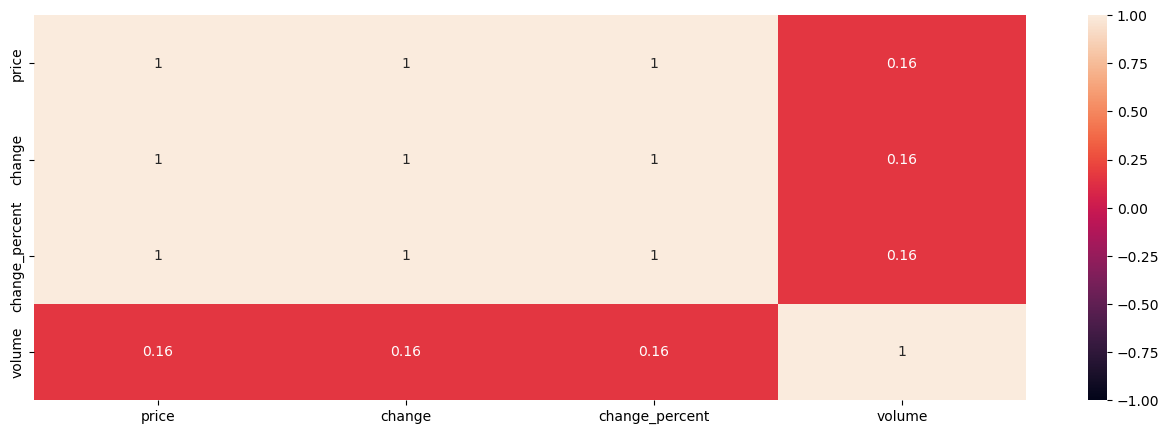

In [272]:
plt.rcParams['figure.figsize'] = (16, 5)
# plt.figure(figsize=(16,5))
number_columns = stock_price.select_dtypes('number').columns
sns.heatmap(stock_price[number_columns].corr(), vmax=1, vmin=-1, annot=True)

### Сводные таблицы

### Визуализации

<Axes: >

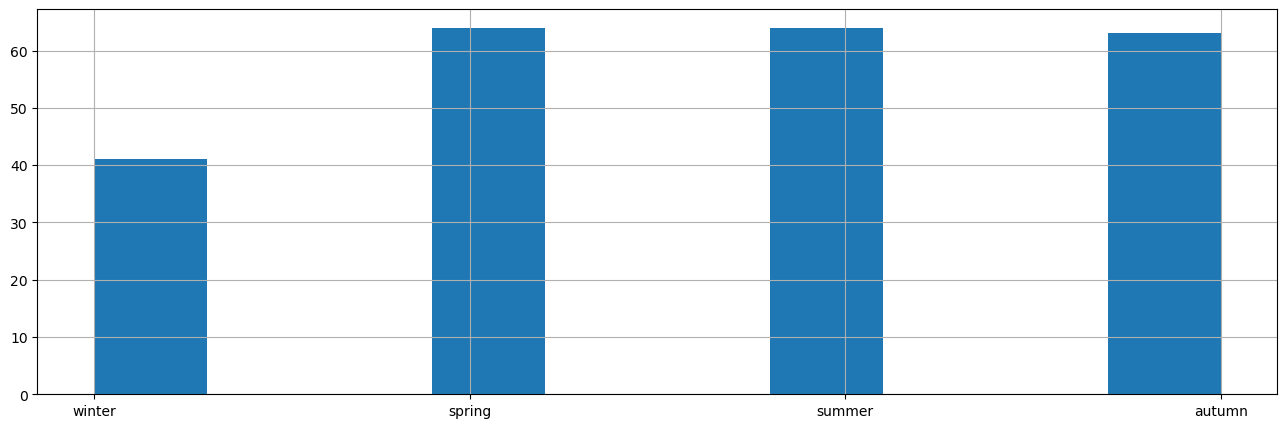

In [290]:
stock_price.season.hist()

<Axes: >

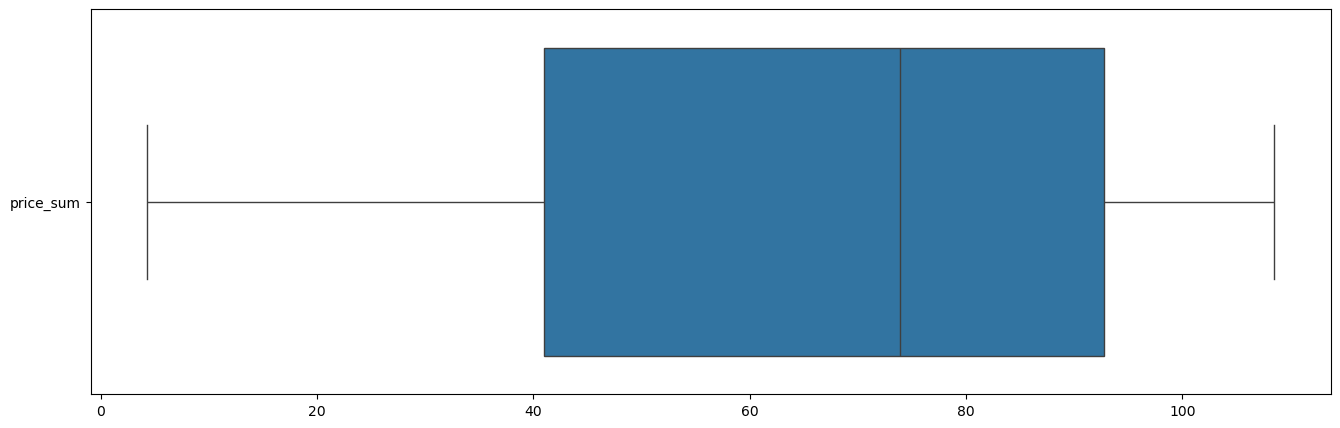

In [304]:
month_price_sum = stock_price.groupby('month').price.agg(price_sum='sum')
sns.boxplot(month_price_sum, orient='h')

### Интересные методы

In [124]:
stock_price.volume.astype('str').replace('\\.0', '!!', regex=True)

0       7668027!!
1       4858879!!
2       5262860!!
3       4090692!!
4      10357731!!
          ...    
227     9996317!!
228    10875523!!
229    10559680!!
230    11259913!!
231           nan
Name: volume, Length: 232, dtype: object